# Исследование успешности компьютерных игр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Шаг 1. Знакомство с данными

Импортируем нужные для работы библиотеки и данные.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Описание данных:**

`Name` — название игры  
`Platform` — платформа  
`Year_of_Release` — год выпуска  
`Genre` — жанр игры  
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
`EU_sales` — продажи в Европе (миллионы проданных копий)    
`JP_sales` — продажи в Японии (миллионы проданных копий)  
`Other_sales` — продажи в других странах (миллионы проданных копий)  
`Critic_Score` — оценка критиков (максимум 100)  
`User_Score` — оценка пользователей (максимум 10)  
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
  
В описании указано, что данные в таблице до 2016 года и данные за 2016 год могут быть неполными. 

### Шаг 2. Подготовка данных

#### Шаг 2.1. Изменение названий столбцов и типов данных

Приведем названия столбцов к нижнему регистру.

In [3]:
df = df.rename(columns={
    'Name':'name',
    'Platform':'platform',
    'Year_of_Release':'year_of_release',
    'Genre':'genre',
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score',
    'User_Score':'user_score',
    'Rating':'rating'
})

df.head()

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Столбцы `NA_sales`, `EU_sales` и `JP_sales` оставим как есть, так как большими буквами здесь указано сокращение региона.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Столбец `year_of_release` поменяем на тип данных `int`, так как год - это целое число. Пропуски удалим, т.к. их немного, а для анализа год выпуска игры крайне важен.

In [5]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
df['year_of_release'] = df['year_of_release'].astype('int')

Cтолбец `user_score` имеет тип данных `object`, хотя вроде бы содержит числовые значения. Проверим уникальные значения столбца.

In [6]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо числовых и пропущенных зачений в столбце есть значение `tbd`. TBD — аббревиатура, которая расшифровывается в английском как to be determined и означает соответственно «будет объявлено позднее» или «будет сообщено». Возможно, это игры, которые вышли недавно и их рейтинг еще не посчитан. В любом случае эти значения также можно считать как пропуски. Заменим тип данных на `float`.

In [7]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   NA_sales         16446 non-null  float64
 5   EU_sales         16446 non-null  float64
 6   JP_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


Данные приведены к нужным типам. 

#### Шаг 2.2. Обработка пропусков и дубликатов

Проверим таблицу на дубликаты.

In [9]:
df.duplicated().sum()

0

Явных дубликатов нет.  

In [10]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [11]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Неявных дубликатов в категориях игр и названиях платформ нет.  
В столбце с названием игр два пропущенных значения, посмотрим на эти строки.

In [12]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Названия игр неизвестны, жанры неизвестны, эти строки непригодны для анализа, удалим их.

In [13]:
df = df.dropna(subset=['name']).reset_index(drop=True)

В столбцах `critic_score` и `user_score` около 50% пропущенных значений. Данные столбцы содержат уникальные реакции критиков и пользователей, основанных на огромном разнообразии переменных, таких как сюжет, геймплей, графика и т.д.
Поэтому будет неверно заполнить данные столбцы ни медианой, ни средним, ни корелляцией по жанру и разработчику, т.к. каждая игра уникальна по составу и качеству исполнения даже в рамках одного жанра и разработчика.  
Посмотрим на уникальные значения столбца `rating`.

In [14]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Википедия поможет разъяснить эти значения:  
  
`«E» («Everyone»)` — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.  
`«T» («Teen»)` — «Подросткам»: Игра подходит для лиц от 13 лет.  
`«M» («Mature»)` — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.  
`«E10+» («Everyone 10 and older»)` — «Для всех от 10 лет и старше»  
`«EC» («Early childhood»)` — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone».  
`«K-A» («Kids to Adults»)` — первоначально так назывался рейтинг «E» («Everyone»)  
`«AO» («Adults Only 18+»)` — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.  
`«RP» («Rating Pending»)` — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.  

Заменим редко встречающиеся рейтинги на похожие: ЕС на Е, К-А на Е, АО на М. RP и пропуски заменим на Unknown.

In [15]:
df.loc[df['rating'] == 'EC', 'rating'] = 'E'
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'
df.loc[df['rating'] == 'AO', 'rating'] = 'M'
df.loc[(df['rating'] == 'RP') | (df['rating'].isna()), 'rating'] = 'Unknown'
df['rating'].value_counts()

Unknown    6677
E          3932
T          2905
M          1537
E10+       1393
Name: rating, dtype: int64

#### Шаг 2.3. Рассчеты и добавление новых столбцов

Посчитаем суммарные продажи во всех регионах и запишем их в новый столбец.

In [16]:
df['total_sales'] = df['NA_sales'] + df['EU_sales'] + df['JP_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown,0.01


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.4+ MB


Предобработка окончена, перейдем к этапу анализа.

### Шаг 3. Исследовательский анализ данных

Для начала посмотрим, сколько игр выпускалось в разные годы. 

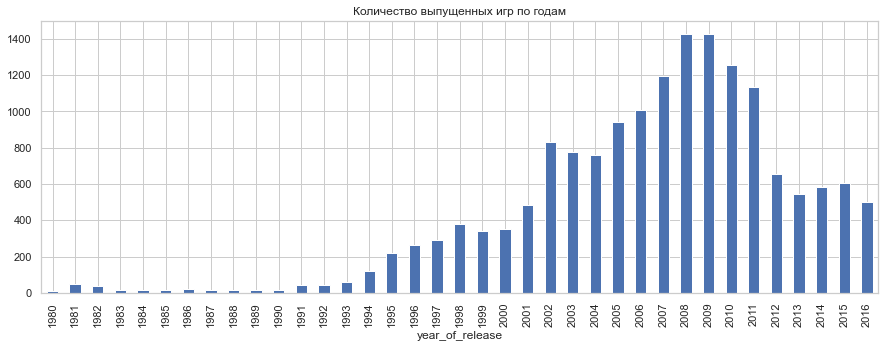

In [46]:
df.groupby('year_of_release')['name'].count().plot(kind='bar', grid=True, figsize=(15, 5))
plt.title('Количество выпущенных игр по годам')

plt.show()

Общую картину я бы описала так: до 1993 года стабильно выпускалось довольно мало игр, после 1993 мы видим стабильное увеличение количества игр, которое достигает пика в 2008-2009 годах (около 1400 игр в год), далее количество выпущенных игр резко уменьшается и после 2011 года выходит на плато с выпуском примерно 500-600 игр в год.  
  
Посмотрим, как менялись продажи по платформам.

In [19]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Возьмем топ-10 платформ с наибольшими суммарными продажами и построим распределение по годам. 

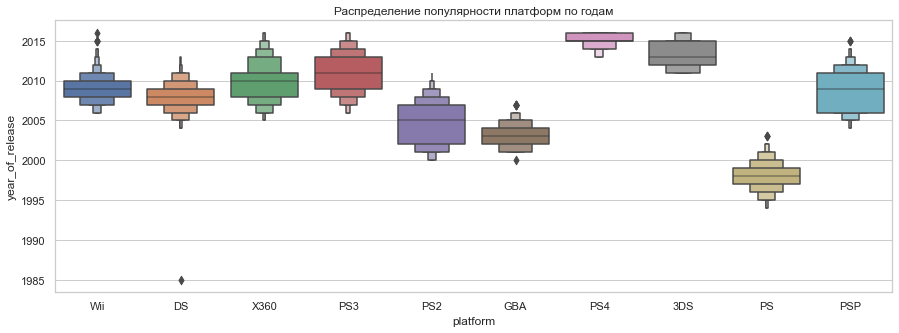

In [20]:
main_platform = ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'GBA', 'PS4', 'PSP', '3DS']

sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 5))
sns.boxenplot(x=df.query('platform in @main_platform')['platform'], 
              y=df.query('platform in @main_platform')['year_of_release'])
plt.title('Распределение популярности платформ по годам')
plt.show()

Из графика видно, что жизненный цикл платформы в среднем около 10 лет. Чтобы построить прогноз на 2017 год нужно взять актуальный период: возьмем данные с 2012 года, когда количество выпущенных игр вышло на плато с выпуском 500-600 игр в год, старые платформы изжили себя (GBA, PS, PS2, DS), а новые идут в рост (3DS, PS4).  
  
Создадим новую отсортированную таблицу с данными с 2012 года и посмотрим, какие платформы лидируют по продажам, растут или падают.

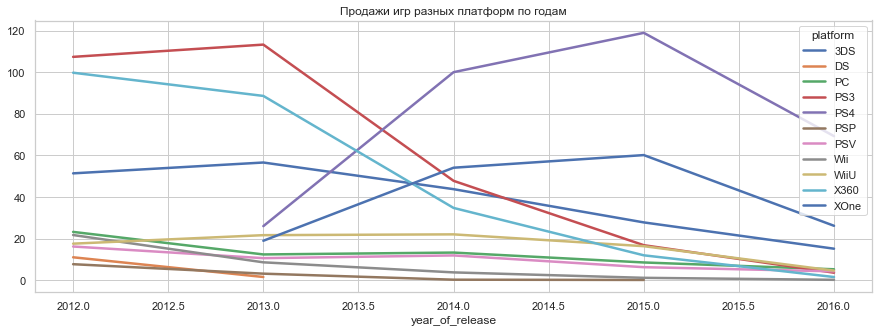

In [21]:
df_new = df.query('year_of_release >= 2012').reset_index(drop=True)

df_new.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum').plot(figsize=(15, 5), linewidth=2.5)
plt.title('Продажи игр разных платформ по годам')
plt.show()

К 2016 году продажи по всем платформам падают. Но по сравнению с остальными платформами продажи на PS4 и XOne растут до 2015 года и к 2016 падают не так стремительно, как остальные.

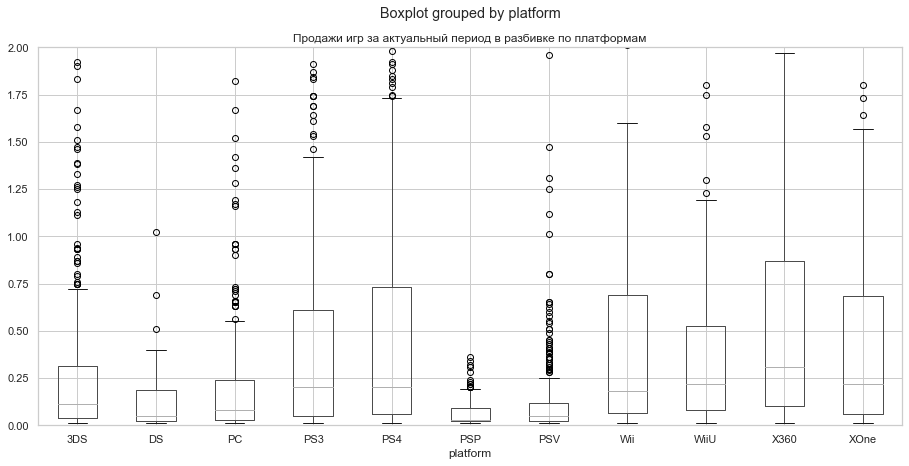

In [23]:
df_new.boxplot('total_sales', by='platform', figsize=(15, 7))
plt.title('Продажи игр за актуальный период в разбивке по платформам')
plt.ylim(0, 2)
plt.show()

Самые большие показатели здесь у PS3, PS4, Wii, WiiU, X360, XOne, по сравнению с аутсайдерами 3DS, DS, PC, PSP, PSV. Из более прибыльных платформ самые большие показатели все же у X360 - первый и третий квартили, медиана, верхний ус - выше, чем у остальных платформ. У более новой версии Xbox - XOne - показатели чуть меньше. При этом обратную картину видим с PS4 и PS3 - продажи на новой PS4 чуть больше чем на старой версии PS3. Wii и WiiU (приставки Nintendo) совсем немного отстают от своих конкурентов.

Посмотрим, как на продажи влияют отзывы пользователей и критиков на примере одной популярной платформы - PS4. Построим диаграмму рассеяния и посчитаем корреляцию.

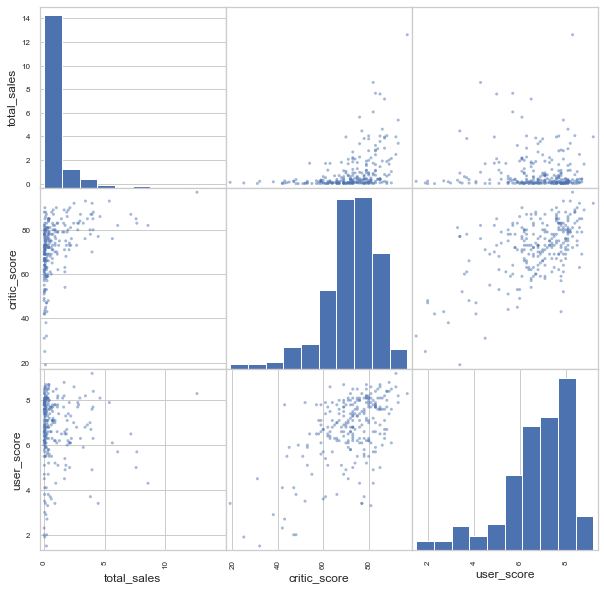

In [24]:
pd.plotting.scatter_matrix(df_new.query('platform == "PS4"')[['total_sales', 'critic_score', 'user_score']], figsize=(10, 10))
plt.show()

In [25]:
df_new.query('platform == "PS4"')[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Есть небольшая положительная корреляция между продажами и оценкой критиков и практически нулевая корреляция между продажами и оценкой пользователей.  
  
Посмотрим на корреляцию по всем платформам за актуальный период.

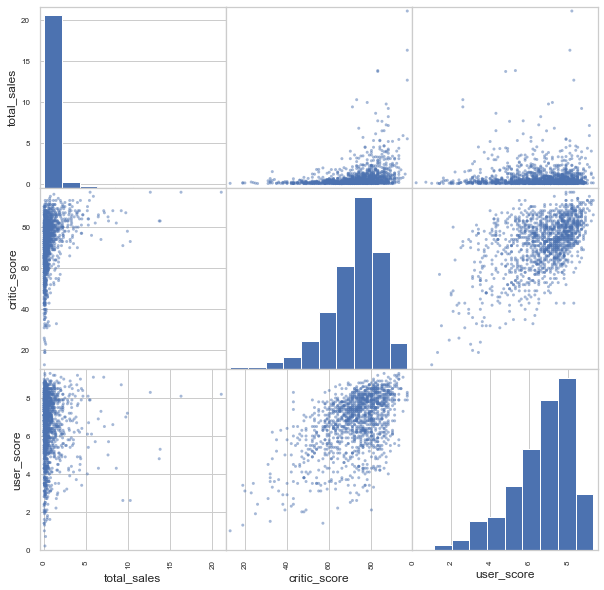

In [26]:
pd.plotting.scatter_matrix(df_new[['total_sales', 'critic_score', 'user_score']], figsize=(10, 10))
plt.show()

In [27]:
df_new[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.308197,0.004429
critic_score,0.308197,1.000000,0.517727
user_score,0.004429,0.517727,1.000000


Очень похожие выводы и по всем платформам - небольшая положительная корреляция между продажами и оценкой критиков и нулевая между продажами и оценкой пользователей.  
  
Посмотрим на общее распределение игр по жанрам.

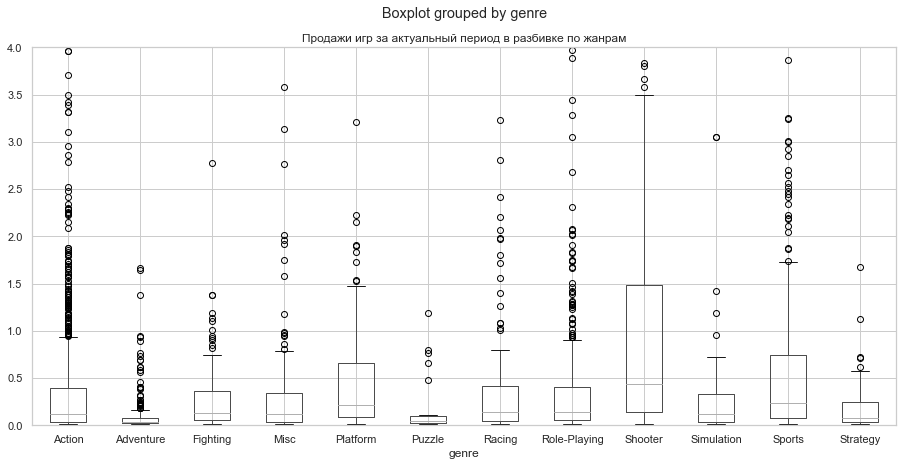

In [28]:
df_new.boxplot('total_sales', by='genre', figsize=(15, 7))
plt.title('Продажи игр за актуальный период в разбивке по жанрам')
plt.ylim(0, 4)
plt.show()

Сразу виден лидер - жанр Shooter. Далее по популярности жанры Platform и Sports. Хуже всего продаются жанры Adventure и Puzzle.

### Шаг 4. Портрет пользователей разных регионов

#### Шаг 4.1. Самые популярные платформы

Определим для пользователя каждого региона (NA, EU, JP) топ-5 самых популярных платформ.

In [29]:
top_platform = df_new.pivot_table(index='platform', values=['NA_sales', 'EU_sales', 'JP_sales'], aggfunc='sum')
top_platform['EU_percent'] = top_platform['EU_sales'] / top_platform['EU_sales'].sum() * 100
top_platform['JP_percent'] = top_platform['JP_sales'] / top_platform['JP_sales'].sum() * 100
top_platform['NA_percent'] = top_platform['NA_sales'] / top_platform['NA_sales'].sum() * 100
top_platform

,EU_sales,JP_sales,NA_sales,EU_percent,JP_percent,NA_percent
platform,,,,,,
3DS,42.64,87.79,55.31,8.413243,45.586250,9.359189
DS,3.53,3.72,4.59,0.696500,1.931665,0.776689
PC,37.76,0.00,19.12,7.450377,0.000000,3.235359
PS3,106.86,35.29,103.38,21.084409,18.324852,17.493274
PS4,141.09,15.96,108.74,27.838286,8.287465,18.400257
PSP,0.42,10.47,0.13,0.082870,5.436702,0.021998
PSV,11.36,21.04,10.98,2.241427,10.925330,1.857962
Wii,11.92,3.39,17.45,2.351920,1.760307,2.952773
WiiU,25.13,13.01,38.10,4.958368,6.755634,6.447028


Топ-5 платформ Японии в процентах:   

In [30]:
top_platform['JP_percent'].sort_values(ascending=False).head(5)

platform
3DS     45.586250
PS3     18.324852
PSV     10.925330
PS4      8.287465
WiiU     6.755634
Name: JP_percent, dtype: float64

Топ-5 платформ Северной Америки в процентах:  

In [31]:
top_platform['NA_percent'].sort_values(ascending=False).head(5)

platform
X360    23.698326
PS4     18.400257
PS3     17.493274
XOne    15.757145
3DS      9.359189
Name: NA_percent, dtype: float64

Топ-5 платформ Европы в процентах: 

In [32]:
top_platform['EU_percent'].sort_values(ascending=False).head(5)

platform
PS4     27.838286
PS3     21.084409
X360    14.703445
XOne    10.179156
3DS      8.413243
Name: EU_percent, dtype: float64

Посмотрим на графике для наглядности.

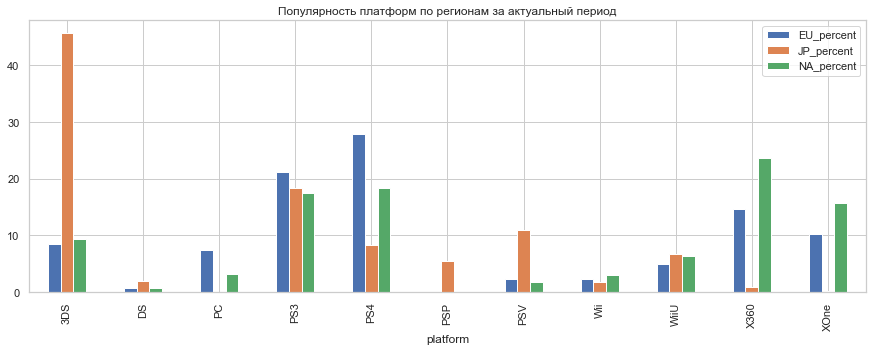

In [33]:
top_platform[['EU_percent', 'JP_percent', 'NA_percent']].plot(kind='bar', figsize=(15, 5))
plt.title('Популярность платформ по регионам за актуальный период')
plt.show()

Сразу видим как Япония отличается от двух других регионов. Почти половину рынка - 45% - занимает платформа 3DS (Nintendo), в Америке и Европе она занимает всего 9% и 8% соответственно. В Европе, судя по всему, предпочитают Sony Playstation: PS4 и PS3 - 27% и 21% рынка, далее по популярности X360 и ХOne - 14% и 10% рынка. В Америке не такие резкие различия популярности платформ, но все же лидирует X360 - 23% рынка. Интересно, что далее по популярности в Америке идут две версии PS: PS4 и PS3 - 18% и 17% рынка, а только потом XOne - 15% рынка.  

#### Шаг 4.2. Самые популярные жанры

Проделаем то же самое для определения топ-5 жанров каждого региона.

In [34]:
top_genre = df_new.pivot_table(index='genre', values=['NA_sales', 'EU_sales', 'JP_sales'], aggfunc='sum')
top_genre['EU_percent'] = top_genre['EU_sales'] / top_genre['EU_sales'].sum() * 100
top_genre['JP_percent'] = top_genre['JP_sales'] / top_genre['JP_sales'].sum() * 100
top_genre['NA_percent'] = top_genre['NA_sales'] / top_genre['NA_sales'].sum() * 100
top_genre

,EU_sales,JP_sales,NA_sales,EU_percent,JP_percent,NA_percent
genre,,,,,,
Action,159.34,52.80,177.84,31.439170,27.417177,30.092898
Adventure,9.46,8.24,8.92,1.866540,4.278741,1.509383
Fighting,10.79,9.44,19.79,2.128961,4.901859,3.348732
Misc,26.32,12.86,38.19,5.193165,6.677744,6.462257
Platform,21.41,8.63,25.38,4.224379,4.481255,4.294634
Puzzle,1.40,2.14,1.13,0.276232,1.111227,0.191211
Racing,27.29,2.50,17.22,5.384555,1.298162,2.913853
Role-Playing,48.53,65.44,64.00,9.575392,33.980683,10.829653
Shooter,113.47,9.23,144.77,22.388619,4.792813,24.497013


Топ-5 жанров Японии в процентах:   

In [35]:
top_genre['JP_percent'].sort_values(ascending=False).head(5)

genre
Role-Playing    33.980683
Action          27.417177
Misc             6.677744
Simulation       5.405546
Fighting         4.901859
Name: JP_percent, dtype: float64

Топ-5 жанров Северной Америки в процентах:

In [36]:
top_genre['NA_percent'].sort_values(ascending=False).head(5)

genre
Action          30.092898
Shooter         24.497013
Sports          13.795963
Role-Playing    10.829653
Misc             6.462257
Name: NA_percent, dtype: float64

Топ-5 жанров Европы в процентах:

In [37]:
top_genre['EU_percent'].sort_values(ascending=False).head(5)

genre
Action          31.439170
Shooter         22.388619
Sports          13.632059
Role-Playing     9.575392
Racing           5.384555
Name: EU_percent, dtype: float64

Посмотрим на графике.

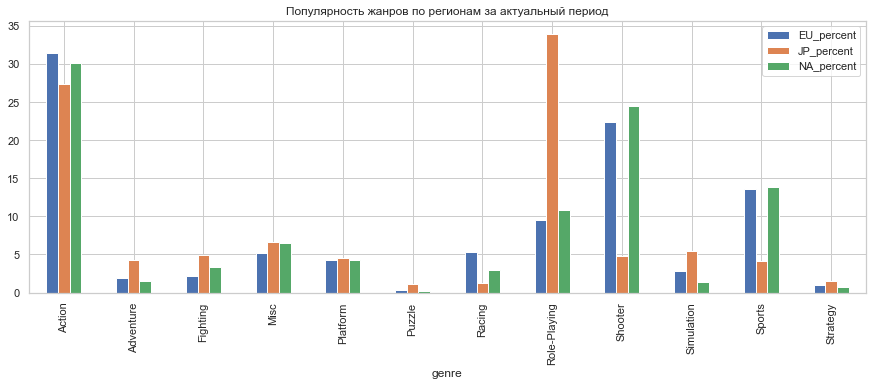

In [38]:
top_genre[['EU_percent', 'JP_percent', 'NA_percent']].plot(kind='bar', figsize=(15, 5))
plt.title('Популярность жанров по регионам за актуальный период')
plt.show()

Здесь тоже Япония отличается сильнее всего: 33% занимают ролевые игры (RPG), в Америке и Европе они занимают только 10% и 9% соответственно. При этом жанр экшн (Action) во всех трех регионах имеет похожие значения: Япония - 27%, Америка - 30%, Европа - 31%. Интересно, что шутеры (Shooter) почти одинаково популярны в Америке - 24% и Европе - 22%, а в Японии они даже не входят в топ-5 и занимают всего 4% рынка. То же самое со спортом (Sports): в Америке - 13%, в Европе - 13%, в Японии не входит в топ-5 и занимает только 4%. В целом рынок Америки и Европы по жанрам очень сильно схож, почти идентичен, а рынок Японии сильно отличается.

#### Шаг 4.3. Оценка влияния рейтинга ESRB на продажи

Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [39]:
top_rating = df_new.pivot_table(index='rating', values=['NA_sales', 'EU_sales', 'JP_sales', 'other_sales'], aggfunc='sum')

top_rating['EU_percent'] = top_rating['EU_sales'] / top_rating['EU_sales'].sum() * 100
top_rating['JP_percent'] = top_rating['JP_sales'] / top_rating['JP_sales'].sum() * 100
top_rating['NA_percent'] = top_rating['NA_sales'] / top_rating['NA_sales'].sum() * 100
top_rating['other_percent'] = top_rating['other_sales'] / top_rating['other_sales'].sum() * 100
top_rating

,EU_sales,JP_sales,NA_sales,other_sales,EU_percent,JP_percent,NA_percent,other_percent
rating,,,,,,,,
E,113.03,28.33,114.37,31.44,22.301803,14.710770,19.352928,20.133197
E10+,55.37,8.19,75.70,16.23,10.924983,4.252778,12.809449,10.393186
M,193.96,21.20,231.57,63.38,38.269997,11.008412,39.184730,40.586578
T,52.96,26.02,66.02,17.94,10.449469,13.511268,11.171464,11.488217
Unknown,91.50,108.84,103.31,27.17,18.053747,56.516772,17.481429,17.398822


`«E» («Everyone»)` — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет.  
`«T» («Teen»)` — «Подросткам»: Игра подходит для лиц от 13 лет.  
`«M» («Mature»)` — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.  
`«E10+» («Everyone 10 and older»)` — «Для всех от 10 лет и старше»  

Посмотрим подробнее какие игры у нас `Unknown` - рейтинг ESRB неизвестен, т.к. их довольно большое количество, а в Японии вообще больше половины продаж - игры с неизвестным рейтингом ESRB.

In [40]:
df_new.query('rating == "Unknown"')['platform'].value_counts()

PSV     273
3DS     254
PS3     193
PSP     166
PS4     137
PC       65
XOne     61
X360     48
WiiU     42
Wii      20
DS       16
Name: platform, dtype: int64

Больше всего игр с неизвестным рейтингом ESRB на платформах PSV, 3DS - как раз таки популярные платформы в Японии, а в других регионах нет.

In [41]:
df_new.query('rating == "Unknown"')['genre'].value_counts()

Action          475
Adventure       234
Role-Playing    197
Misc            107
Sports           60
Strategy         41
Fighting         38
Simulation       38
Shooter          34
Racing           27
Platform         12
Puzzle           12
Name: genre, dtype: int64

Больше всего игр с неизвестным рейтингом ESRB в жанрах Action, Adventure, Role-Playing, Misc. Action популярен во всех регионах, Adventure не популярен нигде, Role-Playing больше всего популярен в Японии. Здесь сложно сделать какие-то выводы.  
  
Посмотрим на продажи по рейтингу на графике.

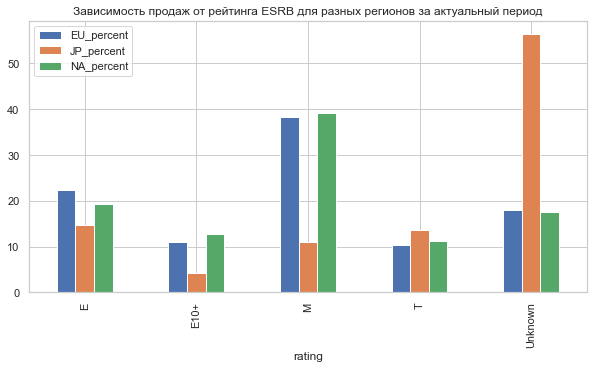

In [42]:
top_rating[['EU_percent', 'JP_percent', 'NA_percent']].plot(kind='bar', figsize=(10, 5))
plt.title('Зависимость продаж от рейтинга ESRB для разных регионов за актуальный период')
plt.show()

Вывод здесь можно сделать такой: в Европе и Америке больше всего продаж с рейтингом ESRB - M (Для взрослых от 17 лет) - почти 40% рынка. Для рынка Японии рейтинг ESRB практически безразличен.

### Шаг 5. Проверка гипотез

#### Шаг 5.1. Проверка гипотезы 1

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны; альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [43]:
from scipy import stats as st
result = st.ttest_ind(df_new.query('platform == "XOne"')['user_score'], 
                      df_new.query('platform == "PC"')['user_score'], nan_policy='omit')

alpha = 0.05

print(result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.5535080500642724
Не удалось отвергнуть нулевую гипотезу


Не удалось отвергнуть нулевую гипотезу: большая вероятность того, что средние пользовательские рейтинги платформ Xbox One и PC равны.

#### Шаг 5.2. Проверка гипотезы 2

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны; альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports различаются.

In [44]:
from scipy import stats as st
result = st.ttest_ind(df_new.query('genre == "Action"')['user_score'], 
                      df_new.query('genre == "Sports"')['user_score'], nan_policy='omit')

alpha = 0.05

print(result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

3.716308946093586e-26
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу: большая вероятность того, что средние пользовательские рейтинги жанров Action и Sports различаются.

### Шаг 6. Выводы

Для разных регионов прогнозировать кампанию нужно по-разному. Рынок Японии значительно отличается от рынков Европы и Америки.  
  
Для рынка `Японии:`  
1. `Самые популярные жанры игр:` Role-Playing - 34% рынка, Action - 27%, Misc - 6%, Simulation - 5%, Fighting -  4%.
2. `Самые популярные платформы:` 3DS - 45% рынка, PS3 - 18%, PSV - 11%, PS4 - 8%, WiiU - 6%.  
3. `Рейтинг ESRB:` рынок Японии безразличен к рейтингу ESRB, нужен дополнительный анализ рейтингов в Японии (предположение что у них работают какие-то другие, свои рейтинги).
  
Для рынка `Европы:`  
1. `Самые популярные жанры игр:` Action - 31% рынка, Shooter - 22%, Sports - 13%, Role-Playing - 9%, Racing - 5%.
2. `Самые популярные платформы:` PS4 - 27% рынка, PS3 - 21%, X360 - 14%, XOne - 10%, 3DS - 8%.  
3. `Рейтинг ESRB:` больше всего продаж игр с рейтингом «M» («Mature», Для взрослых, от 17 лет).
  
Для рынка `Северной Америки:`  
1. `Самые популярные жанры игр:` Action - 30% рынка, Shooter - 24%, Sports - 13%, Role-Playing - 10%, Misc - 6%.
2. `Самые популярные платформы:` X360 - 23% рынка, PS4 - 18%, PS3 - 17%, XOne - 15%, 3DS - 9%.  
3. `Рейтинг ESRB:` больше всего продаж игр с рейтингом «M» («Mature», Для взрослых, от 17 лет).
  
Нужно учесть, что присутствует небольшая положительная корреляция между продажами и оценкой критиков, но между продажами и оценкой пользователей корреляция нулевая и не стоит на них опираться.